### Plot faculty hiring distribution by city

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)
from postdocsalary.paths import save_fig, FIGURE_DIR

<ipython-input-2-57b724ca8b01>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
CBSA_df = pd.read_pickle(DATA_DIR / 'city_hiring.pickle')

In [4]:
CBSA_df[:3]

,CBSA_NAME,RPP_all,total_hires,prop_hires,cum_hires,n_uni,n_grad,prop_grad,cum_grad,hiring_grad_disparity
2,"Boston-Cambridge-Newton, MA-NH",115.5,1604.0,0.115679,0.115679,10,2325.0,0.059061,0.059061,0.056618
0,"Chicago-Naperville-Elgin, IL-IN-WI",102.8,919.0,0.066277,0.181956,6,1506.0,0.038256,0.097317,0.028021
6,"New York-Newark-Jersey City, NY-NJ-PA",125.7,854.0,0.061589,0.243545,5,1268.0,0.032211,0.129528,0.029379


### For each city, get the median and 95% CI on salary and real salary

In [9]:
university_df = pd.read_pickle(DATA_DIR/ 'university_ranking_salary.pickle')

In [10]:
university_df[:3]

,World Rank,Institution,Country,National Rank,Quality of Education Rank,Alumni Employment Rank,Quality of Faculty Rank,Research Performance Rank,Score,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,dup,RPP_all,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER
0,1.0,Harvard University,USA,1.0,1,1,1,1,100.0,166027.0,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25.0,1.0,Lawrence S. Bacow,President,6174951000,42103580.0,082359691|149617367|047006379,215500.0,1.0,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,2.0,1.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,8.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,5.0,2.0,-2,-2.0,14460,1,148,71650.0,25017,Middlesex County,2505.0,-71.118313,42.374471,96.0,1.0,-71.118313,"Boston-Cambridge-Newton, MA-NH",False,115.5,55783.941620,493,56164.312487,55205.642506,48297.784952,48627.110378,47797.093079
1,2.0,Massachusetts Institute of Technology,USA,2.0,4,12,2,8,96.7,166683.0,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25.0,1.0,L. Rafael Reif,President,6172531000,42103594.0,001425594,217800.0,1.0,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2.0,1.0,2.0,9.0,1.0,1.0,12.0,1.0,2.0,2.0,2.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,14.0,15.0,14.0,6.0,17.0,15.0,15.0,15.0,1.0,4.0,2.0,-2,-2.0,14460,1,148,71650.0,25017,Middlesex County,2507.0,-71.093226,42.359243,96.0,1.0,-71.093226,"Boston-Cambridge-Newton, MA-NH",False,115.5,56659.816586,680,56950.613563,56164.312487,49056.118257,49307.890531,48627.110378
2,3.0,Stanford University,USA,3.0,10,4,3,2,95.1,243744.0,Stanford University,,,Stanford,CA,94305,6.0,8.0,Marc Tessier-Lavigne,President,6507232300,941156365.0,009214214,130500.0,1.0,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,1.0,1.0,2.0,21.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,11.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,4.0,2.0,-2,-2.0,41940,1,488,-2.0,6085,Santa Clara County,618.0,-122.167359,37.429434,96.0,1.0,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",False,126.7,62476.603840,349,63319.925605,62352.688787,49310.658122,49976.263303,49212.856186


In [5]:
salary_df = pd.read_pickle(DATA_DIR/ 'postdoc_salary_df_inflation_adjusted_ranking.pickle')

In [6]:
salary_df[:3]

,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,CASE_SUBMITTED,PERIOD_OF_EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PUBLIC_DISCLOSURE,CASE_DATE,dataset,BASE_SALARY,SOC_NAME,EMPLOYMENT_START_DATE,RECEIVED_DATE,BEGIN_DATE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_JOB_TITLE,WAGE_RATE_OF_PAY,INFLACTION_SCALED_BASE_SALARY,INFLATION_SCALED_BASE_SALARY,INSTNM,institution
48938,POSTDOCTORAL RESEARCHER,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-04-19 12:23:24,2019-08-15 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,UNIVERSITY OF PENNSYLVANIA,PHILADELPHIA,PA,19104,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19104,68978.5,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-04-19 12:23:24,2020Q4,68978.5,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,68978.5,71683.249058,University of Pennsylvania,University of Pennsylvania
49510,POSTDOCTORAL FELLOW RESEARCH ASSOCIATE,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-06-18 09:09:18,2019-08-01 00:00:00,TEMPLE UNIVERSITY--A COMMONWEALTH UNIVERSITY,TEMPLE UNIVERSITY,PHILADELPHIA,PA,19122,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19122,60000.0,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-06-18 09:09:18,2020Q4,60000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,60000.0,62352.688787,Temple University,Temple University
77188,POSTDOCTORAL RESEARCH ASSOCIATE,"COMPUTER PROGRAMMERS, R&D",Y,2019-03-15 09:05:46,2019-06-01 00:00:00,RENSSELAER POLYTECHNIC INSTITUTE,NaN,TROY,NY,12180,UNITED STATES OF AMERICA,Troy,Rensselaer,NEW YORK,12180,50000.0,NaN,Year,46883.0,Year,Level I,PLACE OF BUSINESS,2019-03-15 09:05:46,2020Q4,50000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,50000.0,51960.573989,Rensselaer Polytechnic Institute,Rensselaer Polytechnic Institute


### disclude salaries not associated with a university

In [17]:
salary_df = salary_df[salary_df.INSTNM.isnull() == False]

In [18]:
len(salary_df)

28217

### Disclude salaries  outside of normal range

In [19]:
salary_df.sort_values(by="INFLATION_SCALED_BASE_SALARY", ascending=False)[:10]
salary_df = salary_df[
    (salary_df.INFLATION_SCALED_BASE_SALARY > 30000) &
    (salary_df.INFLATION_SCALED_BASE_SALARY < 100000)
]
len(salary_df)

27572

### Connect salaries to cities

In [27]:
def bootstrap_ci(x, ci=95, func = np.median, n_samples = 1000):
    vals = [func(np.random.choice(x, len(x), replace=True)) for i in range(n_samples)]
    bounds_0 = (100-ci)/2
    bounds_1 = 100 - bounds_0
    lower, upper = np.percentile(vals, (bounds_0, bounds_1))
    return lower, upper

In [31]:
median_salary = []
n_salaries = []
salary_upper = []
salary_lower = []
for idx, row in tqdm(CBSA_df.iterrows(), total=len(CBSA_df)):
    city_salaries = salary_df[salary_df.INSTNM.isin(university_df[university_df.CBSA_NAME == row.CBSA_NAME].INSTNM.values)]
    salary_values = city_salaries.INFLATION_SCALED_BASE_SALARY.values
    salary_bounds = bootstrap_ci(salary_values)
    salary_upper.append(salary_bounds[1])
    salary_lower.append(salary_bounds[0])
    med_sal = np.median(salary_values)
    if np.isnan(med_sal):
        median_salary.append(np.nan)
        n_salaries.append(0)
        print("No postdoc data: {}".format( row.CBSA_NAME))
        continue
    median_salary.append(med_sal)
    n_salaries.append(len(salary_values))
median_salary = np.array(median_salary)
n_salaries = np.array(n_salaries)

  0%|          | 0/112 [00:00<?, ?it/s]

/home/AD/tsainbur/anaconda3/envs/postdoc/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/AD/tsainbur/anaconda3/envs/postdoc/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


No postdoc data: Madison, WI
No postdoc data: Lansing-East Lansing, MI
No postdoc data: Gainesville, FL
No postdoc data: Charlottesville, VA
No postdoc data: Knoxville, TN
No postdoc data: Fayetteville-Springdale-Rogers, AR
No postdoc data: Binghamton, NY
No postdoc data: Albuquerque, NM
No postdoc data: Orlando-Kissimmee-Sanford, FL
No postdoc data: Urban Honolulu, HI
No postdoc data: Manhattan, KS
No postdoc data: Lebanon, NH-VT
No postdoc data: Provo-Orem, UT
No postdoc data: Las Cruces, NM
No postdoc data: Carbondale-Marion, IL
No postdoc data: Charlotte-Concord-Gastonia, NC-SC
No postdoc data: Rolla, MO
No postdoc data: Bangor, ME
No postdoc data: Morgantown, WV
No postdoc data: Hattiesburg, MS
No postdoc data: Bloomington, IL
No postdoc data: Ogdensburg-Massena, NY
No postdoc data: El Paso, TX
No postdoc data: Palm Bay-Melbourne-Titusville, FL
No postdoc data: Las Vegas-Henderson-Paradise, NV
No postdoc data: Winston-Salem, NC


In [25]:
len(city_salaries)

1683

In [32]:
CBSA_df["MEDIAN_SALARY"] = median_salary
CBSA_df["N_SALARIES"] = n_salaries
CBSA_df["MEDIAN_SALARY_UPPER"] = salary_upper
CBSA_df["MEDIAN_SALARY_LOWER"] = salary_lower

In [33]:
# Median salary scaled to RPP
CBSA_df["REAL_MEDIAN_SALARY"] = median_salary / (CBSA_df["RPP_all"].values / 100)
CBSA_df["REAL_MEDIAN_SALARY_UPPER"] = CBSA_df["MEDIAN_SALARY_UPPER"] / (CBSA_df["RPP_all"].values / 100)
CBSA_df["REAL_MEDIAN_SALARY_LOWER"] = CBSA_df["MEDIAN_SALARY_LOWER"] / (CBSA_df["RPP_all"].values / 100)

In [36]:
CBSA_df.to_pickle(DATA_DIR/ 'CBSA_df_salary.pickle')

In [35]:
CBSA_df[:3]

,CBSA_NAME,RPP_all,total_hires,prop_hires,cum_hires,n_uni,n_grad,prop_grad,cum_grad,hiring_grad_disparity,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER
2,"Boston-Cambridge-Newton, MA-NH",115.5,1604.0,0.115679,0.115679,10,2325.0,0.059061,0.059061,0.056618,55474.915479,1683,55932.677979,55205.642506,48030.229852,48426.561021,47797.093079
0,"Chicago-Naperville-Elgin, IL-IN-WI",102.8,919.0,0.066277,0.181956,6,1506.0,0.038256,0.097317,0.028021,53336.489989,1504,53830.036471,52850.139016,51883.745125,52363.848707,51410.641066
6,"New York-Newark-Jersey City, NY-NJ-PA",125.7,854.0,0.061589,0.243545,5,1268.0,0.032211,0.129528,0.029379,55891.553082,2245,56013.506891,55328.923560,44464.242706,44561.262443,44016.645632


In [44]:
salary_df = salary_df.merge(university_df[["INSTNM", "RPP_all"]], on = "INSTNM")

In [46]:
salary_df["REAL_MEDIAN_SALARY"] = salary_df["INFLATION_SCALED_BASE_SALARY"] / (salary_df["RPP_all"].values / 100)

In [49]:
np.median(salary_df.INFLATION_SCALED_BASE_SALARY.values)

53100.08961257449

In [50]:
np.median(salary_df.REAL_MEDIAN_SALARY.values)

51848.669708466055

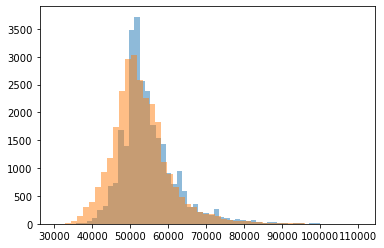

In [48]:
plt.hist(salary_df.INFLATION_SCALED_BASE_SALARY.values, bins=50, alpha = 0.5);
plt.hist(salary_df.REAL_MEDIAN_SALARY.values, bins=50, alpha = 0.5);